In [5]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Softmax

#### Build a feedforward neural network model

In [7]:
model=Sequential([Flatten(input_shape=(28,28)),Dense(16,activation="relu"),Dense(16,activation="relu"),Dense(10,activation="softmax")])


In [8]:
model.weights



[<tf.Variable 'dense/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[ 4.0475160e-02,  1.2890771e-03, -1.0035589e-02, ...,
          7.4193344e-02,  5.2391931e-02,  2.7921639e-02],
        [ 3.6915243e-02, -4.8118085e-03,  1.2435071e-02, ...,
         -6.9126032e-02,  6.7766696e-02,  9.7072870e-04],
        [-6.6105239e-02,  3.3193752e-03,  1.3205372e-02, ...,
         -8.5310347e-02, -3.7617858e-02,  7.9153195e-02],
        ...,
        [ 2.6012987e-02,  5.2822620e-02,  7.2340578e-02, ...,
         -2.2350572e-02,  5.5080026e-02,  8.5824057e-02],
        [-3.1201538e-02,  2.4251312e-02,  5.5884585e-02, ...,
          1.3940036e-05,  4.6472609e-02,  6.3750505e-02],
        [-2.1652371e-02,  7.3727608e-02,  6.7161202e-02, ...,
         -3.3489753e-02,  9.5682070e-03, -1.4092706e-02]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D

#### Build a convolutional neural network model

In [11]:
model=Sequential([Conv2D(16,(3,3),activation="relu",input_shape=(28,28,1)),
MaxPool2D(3,3),
Flatten(),
Dense(10,activation="relu"),
Dense(10,activation="softmax")])

                 
    

In [12]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 10,520
Trainable params: 10,520
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [54]:
# Define the model optimizer, loss function and metrics
opt=tf.keras.optimizers.Adam(learning_rate=0.005)
acc=tf.keras.metrics.SparseCategoricalAccuracy()
mae=tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer=opt,
              loss="sparse_categorical_crossentropy",
              metrics=[acc,mae])




In [51]:
model.compile(optimizer="sgd",
              loss="categorical_crossentropy",
              metrics=["accuracy","mae"])


In [55]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)



sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7f18080f92b0>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7f1797cb5fd0>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [16]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [17]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [18]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [34]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(labels[0])
print(train_labels[0])

T-shirt/top
9


In [35]:
# Rescale the image values so that they lie in between 0 and 1.

train_images=train_images/255
test_images=test_images/255

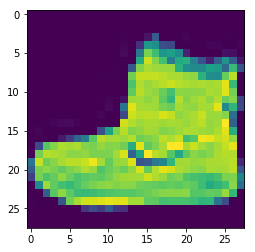

lebels: 9


In [41]:
# Display one of the images
i=0
img=train_images[0,:,:]
plt.imshow(img)
plt.show()
print("lebels:",train_labels[0])


#### Fit the model

In [57]:
# Fit the model
history=model.fit(train_images[...,np.newaxis],train_labels,epochs=8,batch_size=256,verbose=2)


Train on 60000 samples
Epoch 1/8
60000/60000 - 49s - loss: 0.3435 - sparse_categorical_accuracy: 0.8776 - mean_absolute_error: 4.4200
Epoch 2/8
60000/60000 - 49s - loss: 0.3224 - sparse_categorical_accuracy: 0.8839 - mean_absolute_error: 4.4200
Epoch 3/8
60000/60000 - 50s - loss: 0.3070 - sparse_categorical_accuracy: 0.8893 - mean_absolute_error: 4.4200
Epoch 4/8
60000/60000 - 49s - loss: 0.2980 - sparse_categorical_accuracy: 0.8936 - mean_absolute_error: 4.4200
Epoch 5/8
60000/60000 - 50s - loss: 0.2873 - sparse_categorical_accuracy: 0.8956 - mean_absolute_error: 4.4200
Epoch 6/8
60000/60000 - 50s - loss: 0.2780 - sparse_categorical_accuracy: 0.8985 - mean_absolute_error: 4.4200
Epoch 7/8
60000/60000 - 49s - loss: 0.2747 - sparse_categorical_accuracy: 0.9010 - mean_absolute_error: 4.4200
Epoch 8/8
60000/60000 - 49s - loss: 0.2699 - sparse_categorical_accuracy: 0.9013 - mean_absolute_error: 4.4200


#### Plot training history

In [61]:
# Load the history into a pandas Dataframe
df=pd.DataFrame(history.history)
df.head()


,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.343545,0.877583,4.420001
1,0.322427,0.883917,4.420001
2,0.306954,0.889333,4.420001
3,0.298049,0.893600,4.420000
4,0.287295,0.895617,4.420001


[Text(0, 0.5, 'loss')]

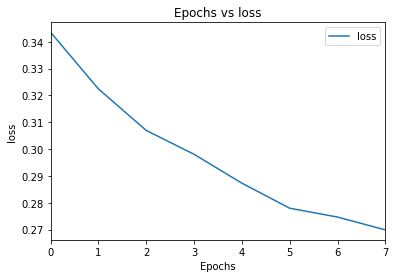

In [66]:
# Make a plot for the loss
loss_plot=df.plot(y="loss",title="Epochs vs loss")
loss_plot.set(xlabel="Epochs")
loss_plot.set(ylabel="loss")

[Text(0, 0.5, 'accuracy')]

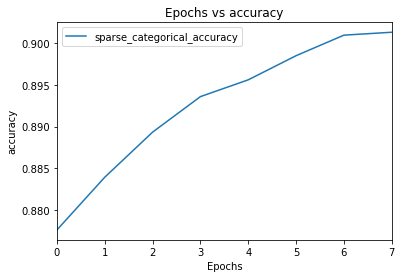

In [76]:
# Make a plot for the accuracy

acc_plot=df.plot(y="sparse_categorical_accuracy",title="Epochs vs accuracy")
acc_plot.set(xlabel="Epochs")
acc_plot.set(ylabel="accuracy")

[Text(0, 0.5, 'loss')]

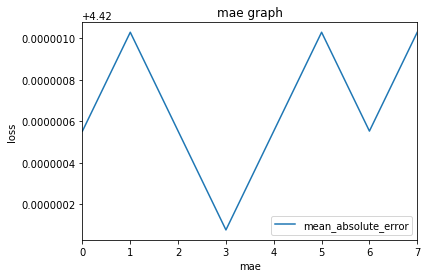

In [79]:
# Make a plot for the additional metric
mae_plot=df.plot(y="mean_absolute_error",title="mae graph")
mae_plot.set(xlabel="mae")
mae_plot.set(ylabel="loss")


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [67]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [69]:
# Evaluate the model
test_loss,test_accuracy,test_mae=model.evaluate(test_images[...,np.newaxis],test_labels,verbose=2)

10000/1 - 5s - loss: 0.3754 - sparse_categorical_accuracy: 0.8902 - mean_absolute_error: 4.4200


#### Make predictions from the model

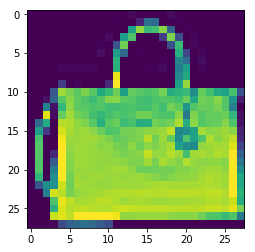

Label: Bag


In [72]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[1])
inx=30
test_image = test_images[inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[inx]]}")

In [74]:
# Get the model predictions
predictios=model.predict(test_image[np.newaxis,...,np.newaxis])
print("prediction is :",labels[np.argmax(predictios)])

prediction is : Bag
